# **End-to-End Exploratory Data Analysis of Banking Transactions**

Custom-created synthetic banking transaction dataset generated for this project

# **Details regarding to the datset**

**Banking transactions generate a large volume of data that contains valuable information about customer behavior and financial activities. By performing exploratory data analysis on transaction data, we can identify spending patterns, detect anomalies, handle missing values, and gain meaningful insights. This project focuses on cleaning and analyzing banking transaction data using Python to better understand real-world financial data.**

**Content**

The dataset contains large-scale banking transaction information collected for exploratory data analysis purposes.

The data consists of multiple records with the following main columns:



1.   transaction_id: Unique identifier assigned to each transaction.

1.   transaction_date: Date and time when the transaction was performed.

1.   account_type: Type of bank account involved in the transaction (e.g., Savings, Current)

1.   customer_segment: Category of the customer based on demographic or usage behavior.

1.   transaction_type: Nature of the transaction such as deposit, withdrawal, or transfer.

1.   amount: Monetary value of the transaction.
2.   balance_before: Account balance before the transaction was executed.


2. merchant_category: Category of the merchant where the transaction occurred.  


2.   payment_mode: Mode of payment used for the transaction (e.g., UPI, Card, Net Banking).


2.   branch_city: City of the bank branch associated with the transaction.


2.   is_fraud: Indicator showing whether the transaction is fraudulent or not


2.   balance_after: Account balance after the transaction was completed.








In [ ]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("finance_transaction.csv")

In [ ]:
# First 5 records
df.head()

,transaction_id,transaction_date,account_type,customer_segment,transaction_type,amount,balance_before,merchant_category,payment_mode,branch_city,is_fraud,balance_after
0,1,31-01-2021,Loan,Corporate,Transfer,1135.19,12278.70,Groceries,Net Banking,Hyderabad,0,11143.51
1,2,30-12-2021,Loan,Retail,Debit,4694.83,68853.50,Shopping,NaN,Chennai,0,64158.67
2,3,10-05-2020,Savings,Corporate,Credit,774.23,56516.23,Bills,Credit Card,Delhi,0,57290.46
3,4,18-07-2021,Current,Corporate,Credit,752.24,131097.81,Groceries,Debit Card,Bangalore,0,131850.05
4,5,04-02-2021,Loan,Retail,Credit,6111.70,132368.65,Shopping,UPI,Delhi,0,138480.35


# **Cleaning and Processing the Dataset**

In [ ]:
df.columns

Index(['transaction_id', 'transaction_date', 'account_type',
       'customer_segment', 'transaction_type', 'amount', 'balance_before',
       'merchant_category', 'payment_mode', 'branch_city', 'is_fraud',
       'balance_after'],
      dtype='object')

In [ ]:
df.shape

(300000, 12)

In [ ]:
df.drop(columns=['transaction_id'], inplace=True)

**We dropped the transaction_id column as it is only a unique identifier and does not add any analytical value to the dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   transaction_date   300000 non-null  object 
 1   account_type       300000 non-null  object 
 2   customer_segment   300000 non-null  object 
 3   transaction_type   300000 non-null  object 
 4   amount             292095 non-null  float64
 5   balance_before     294049 non-null  float64
 6   merchant_category  284944 non-null  object 
 7   payment_mode       284936 non-null  object 
 8   branch_city        300000 non-null  object 
 9   is_fraud           300000 non-null  int64  
 10  balance_after      286329 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
#Statistical info about cat columns
df.describe(include="O")

,transaction_date,account_type,customer_segment,transaction_type,merchant_category,payment_mode,branch_city
count,300000,300000,300000,300000,284944,284936,300000
unique,2000,4,3,3,6,4,6
top,22-01-2019,Savings,Retail,Debit,Shopping,UPI,Pune
freq,190,75191,180189,134636,75389,105085,50169


**Handling Missing Values**

In [ ]:
df.isnull().sum()

,0
transaction_date,0
account_type,0
customer_segment,0
transaction_type,0
amount,7905
balance_before,5951
merchant_category,15056
payment_mode,15064
branch_city,0
is_fraud,0


In [ ]:
df.dtypes

,0
transaction_date,object
account_type,object
customer_segment,object
transaction_type,object
amount,float64
balance_before,float64
merchant_category,object
payment_mode,object
branch_city,object
is_fraud,int64


In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

**Converted transaction_date to datetime format to enable time-based analysis.**

In [ ]:
df['account_type'] = df['account_type'].astype('category')

In [ ]:
df['customer_segment'] = df['customer_segment'].astype('category')

In [ ]:
df['transaction_type'] = df['transaction_type'].astype('category')

In [ ]:
df['merchant_category'] = df['merchant_category'].astype('category')

In [ ]:
df['payment_mode'] = df['payment_mode'].astype('category')

In [ ]:
df['branch_city'] = df['branch_city'].astype('category')

**Converted categorical columns to category datatype for better memory efficiency and faster analysis.**

In [ ]:
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [ ]:
df['balance_before'] = pd.to_numeric(df['balance_before'], errors='coerce')

In [ ]:
df['balance_after'] = pd.to_numeric(df['balance_after'], errors='coerce')

**Converted monetary columns to numeric datatype to support statistical analysis.**

In [ ]:
df['is_fraud'] = df['is_fraud'].astype('int')

**Converted the fraud indicator to integer format for easier analysis.**

In [ ]:
df.dtypes

,0
transaction_date,datetime64[ns]
account_type,category
customer_segment,category
transaction_type,category
amount,float64
balance_before,float64
merchant_category,category
payment_mode,category
branch_city,category
is_fraud,int64


In [ ]:
df['account_type'].unique()

['Loan', 'Savings', 'Current', 'Credit Card']
Categories (4, object): ['Credit Card', 'Current', 'Loan', 'Savings']

In [ ]:
df['transaction_type'].unique()

['Transfer', 'Debit', 'Credit']
Categories (3, object): ['Credit', 'Debit', 'Transfer']

In [ ]:
df['payment_mode'].unique()

['Net Banking', NaN, 'Credit Card', 'Debit Card', 'UPI']
Categories (4, object): ['Credit Card', 'Debit Card', 'Net Banking', 'UPI']

In [ ]:
df.isnull().sum()/len(df)*100

,0
transaction_date,0.000000
account_type,0.000000
customer_segment,0.000000
transaction_type,0.000000
amount,2.635000
balance_before,1.983667
merchant_category,5.018667
payment_mode,5.021333
branch_city,0.000000
is_fraud,0.000000


**Standard guidlines**


1.   Greater than 40% Remove the columns.

1.   If 4% to 40% than fill the columns.
2.   Less than 4% Remove the Rows.






In [ ]:
# As per the amount column has 2% null values are below 4% so it's best to just remove those columns
df = df.dropna(subset=['amount'])

In [ ]:
# As per the balance_before column has 1% null values are below 4% so it's best to just remove those columns
df = df.dropna(subset=['balance_before'])

In [ ]:
# as the merchant_category column has 5% null value we are going to fill it the mode of the same column
#we are using mode because it is a categorical column.
df['merchant_category'].fillna(df['merchant_category'].mode()[0], inplace=True)


In [ ]:
# as the payment_mode column has 5% null value we are going to fill it the mode of the same column
#we are using mode because it is a categorical column.
df['payment_mode'].fillna(df['payment_mode'].mode()[0], inplace=True)

In [ ]:
# as per the balance_after column has 4% null value we are going to fill it the mean of the same column.
#We are using mean here because it is a numerical column.
df['balance_after'].fillna(df['balance_after'].mean(), inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

,0
transaction_date,0.0
account_type,0.0
customer_segment,0.0
transaction_type,0.0
amount,0.0
balance_before,0.0
merchant_category,0.0
payment_mode,0.0
branch_city,0.0
is_fraud,0.0


In [ ]:
df.describe()

,transaction_date,amount,balance_before,is_fraud,balance_after
count,286329,286329.000000,286329.000000,286329.000000,286329.000000
mean,2020-09-27 12:23:47.130328576,4991.280688,100303.075922,0.015042,99288.266061
min,2018-01-01 00:00:00,0.000000,1000.640000,0.000000,-40128.710000
25%,2019-05-18 00:00:00,1432.950000,50705.700000,0.000000,49724.480000
50%,2020-09-28 00:00:00,3448.190000,100249.520000,0.000000,99280.200000
75%,2022-02-10 00:00:00,6907.670000,149947.190000,0.000000,148807.750000
max,2023-06-23 00:00:00,65092.750000,199999.050000,1.000000,240076.890000
std,NaN,5007.501671,57388.697241,0.121721,57788.204929


# **Distribution Analysis of Numerical Columns**
**By observing the difference between the mean and median values of the numerical columns, it is evident that most of the data is right skewed, as the mean is consistently greater than the median.**


*   **If we take a closer look at the main numerical columns used in this analysis:**


**1.**   **Amount:**


*   The minimum transaction amount is 0, while the maximum reaches 65,092.75.
*   The mean transaction amount is 4,991.28, whereas the median is 3,448.19, which is significantly lower than the mean.


*   This large difference between the mean and median, along with the presence of high-value transactions, indicates that the amount column is right skewed.



**2.   Balance Before:**


*   The minimum balance before transaction is 1,000.64, and the maximum is 199,999.05.
*   The mean balance before transaction is 100,303.07, while the median is 100,249.52.


*   Although the mean and median are relatively close, the wide range and high maximum value suggest the presence of extreme values, indicating a slight right skewness in the distribution.



**3.   Balance After:**


*   The balance after transaction ranges from -40,128.71 to 240,076.89.
*   The mean value is 99,288.27, whereas the median is 99,280.20, which is slightly lower than the mean.


*   The presence of extreme positive and negative values results in a right skewed distribution, with noticeable outliers.

























In [ ]:
df.head()

,transaction_date,account_type,customer_segment,transaction_type,amount,balance_before,merchant_category,payment_mode,branch_city,is_fraud,balance_after
0,2021-01-31,Loan,Corporate,Transfer,1135.19,12278.70,Groceries,Net Banking,Hyderabad,0,11143.51
1,2021-12-30,Loan,Retail,Debit,4694.83,68853.50,Shopping,UPI,Chennai,0,64158.67
2,2020-05-10,Savings,Corporate,Credit,774.23,56516.23,Bills,Credit Card,Delhi,0,57290.46
3,2021-07-18,Current,Corporate,Credit,752.24,131097.81,Groceries,Debit Card,Bangalore,0,131850.05
4,2021-02-04,Loan,Retail,Credit,6111.70,132368.65,Shopping,UPI,Delhi,0,138480.35


In [ ]:
df.shape

(286329, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286329 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_date   286329 non-null  datetime64[ns]
 1   account_type       286329 non-null  category      
 2   customer_segment   286329 non-null  category      
 3   transaction_type   286329 non-null  category      
 4   amount             286329 non-null  float64       
 5   balance_before     286329 non-null  float64       
 6   merchant_category  286329 non-null  category      
 7   payment_mode       286329 non-null  category      
 8   branch_city        286329 non-null  category      
 9   is_fraud           286329 non-null  int64         
 10  balance_after      286329 non-null  float64       
dtypes: category(6), datetime64[ns](1), float64(3), int64(1)
memory usage: 14.7 MB


# **OUTLIER DETECTION**
**(Amount)**
**(Balance Before)**
**(Balance After)**

In [ ]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-6779.13), np.float64(15119.75))

In [ ]:
Q1 = df['balance_before'].quantile(0.25)
Q3 = df['balance_before'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(-98156.53500000002), np.float64(298809.42500000005))

In [ ]:
Q1 = df['balance_after'].quantile(0.25)
Q3 = df['balance_after'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(-98900.42499999996), np.float64(297432.65499999997))

# **Visualizing Outliers Using Box Plot**

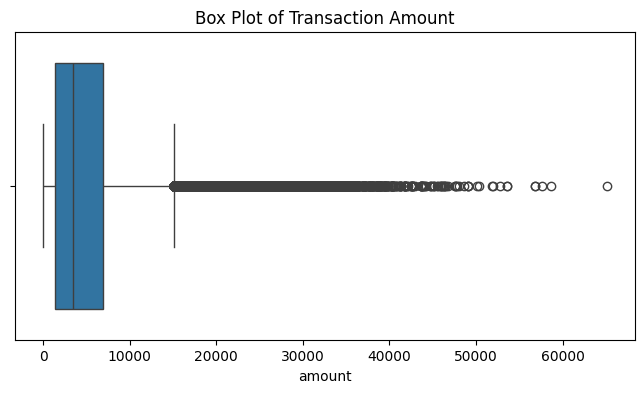

In [ ]:
#Box Plot for amount Column
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amount')
plt.show()

A box plot was used to visualize the distribution of transaction amounts and identify potential outliers. The presence of points beyond the whiskers indicates extreme values contributing to the right-skewed nature of the data.

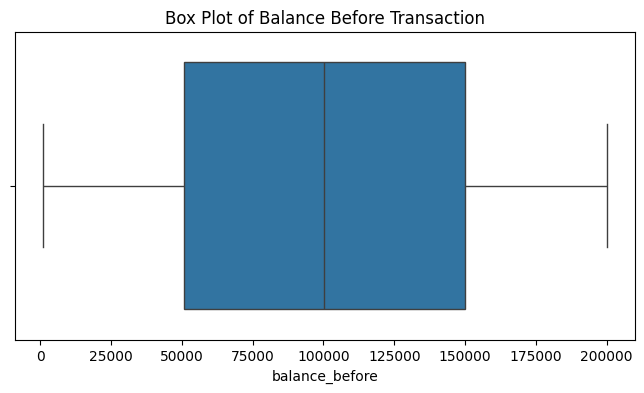

In [ ]:
#Box Plot for balance_before
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['balance_before'])
plt.title('Box Plot of Balance Before Transaction')
plt.show()

The box plot highlights the wide spread of account balances and the presence of extreme values, indicating variability among customers.

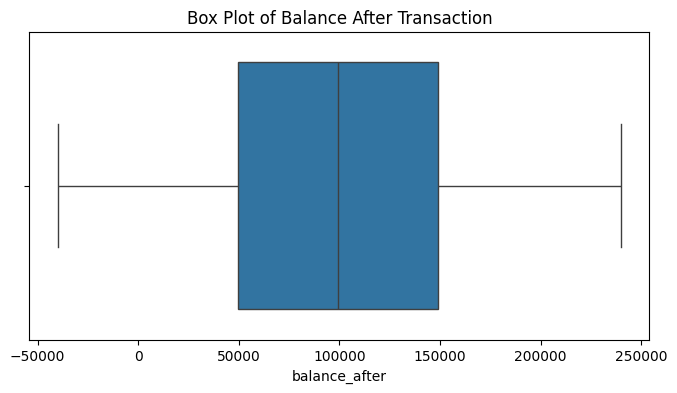

In [ ]:
#Box Plot for balance_after
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['balance_after'])
plt.title('Box Plot of Balance After Transaction')
plt.show()

Outliers in post-transaction balances suggest exceptional cases such as overdrafts or unusually high account balances.

# **Analysis of Transaction Behavior and Risk Patterns**
Understanding customer transaction behavior is essential for identifying financial trends and potential risks.
This analysis can be effectively performed using three key financial metrics:


1.   Amount: Represents the monetary value of a transaction and helps identify high-value financial activity.

1.   Balance Before: Indicates the customer’s financial position before a transaction is made.
2.   Balance After: Reflects the remaining balance post-transaction and helps detect overdrafts or abnormal deductions.






# **VISUALIZATION PART (EDA)**

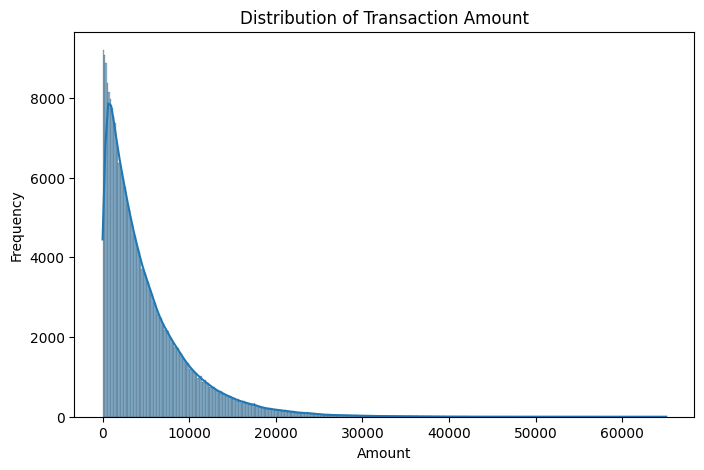

In [ ]:
#Distribution of Transaction Amount
#Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

The distribution of transaction amounts is right skewed, indicating that most transactions are of lower value while a few high-value transactions contribute to the long tail.

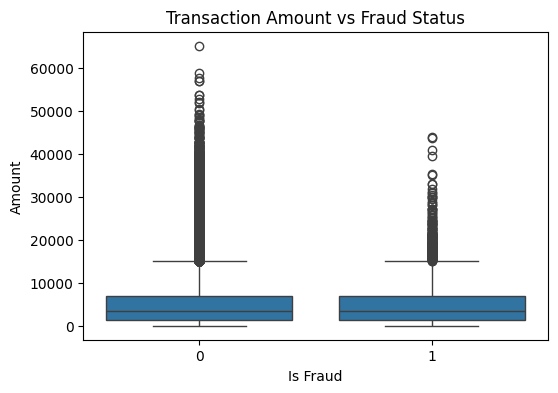

In [ ]:
#Transaction Amount by Fraud Status
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.title('Transaction Amount vs Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()


Fraudulent transactions tend to be associated with higher transaction amounts compared to non-fraudulent ones.

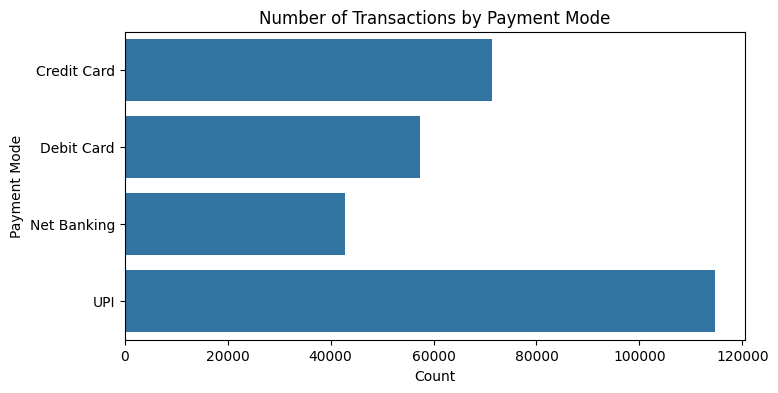

In [ ]:
#Count of Transactions by Payment Mode
plt.figure(figsize=(8,4))
sns.countplot(y='payment_mode', data=df)
plt.title('Number of Transactions by Payment Mode')
plt.xlabel('Count')
plt.ylabel('Payment Mode')
plt.show()


Digital payment modes dominate the transaction volume, highlighting customer preference for online transactions.

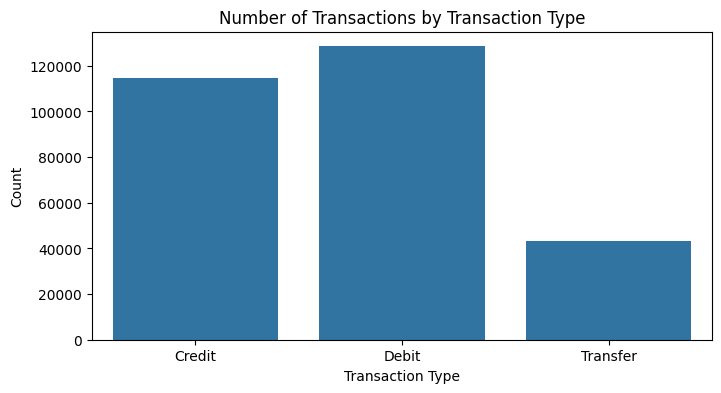

In [ ]:
#Transaction Count by Transaction Type
plt.figure(figsize=(8,4))
sns.countplot(x='transaction_type', data=df)
plt.title('Number of Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

This plot shows the distribution of different transaction types, helping identify the most frequently performed transactions.

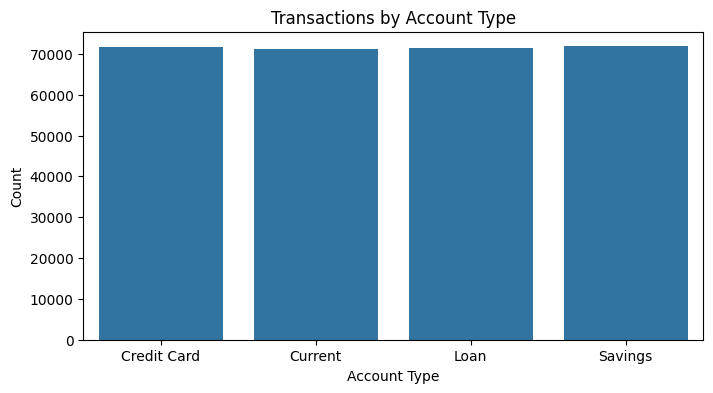

In [ ]:
#Transaction Count by Account Type
plt.figure(figsize=(8,4))
sns.countplot(x='account_type', data=df)
plt.title('Transactions by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()

Savings accounts dominate the transaction volume, indicating higher activity compared to other account types.

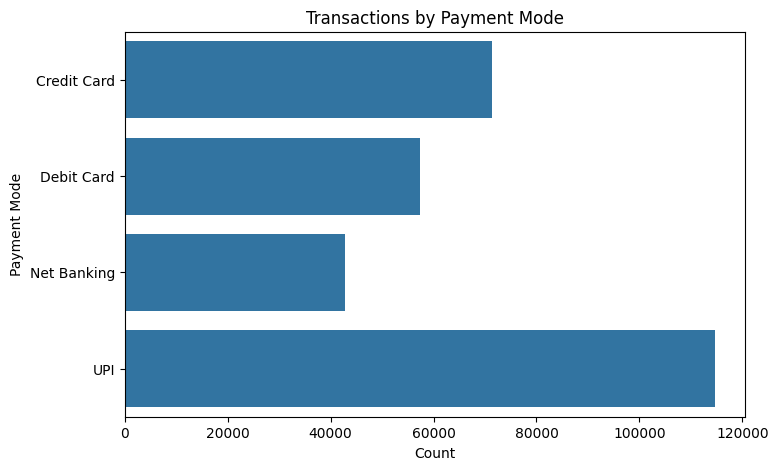

In [ ]:
#Transaction Count by Payment Mode
plt.figure(figsize=(8,5))
sns.countplot(y='payment_mode', data=df)
plt.title('Transactions by Payment Mode')
plt.xlabel('Count')
plt.ylabel('Payment Mode')
plt.show()

Digital payment modes contribute the majority of transactions, reflecting user preference for online payments.

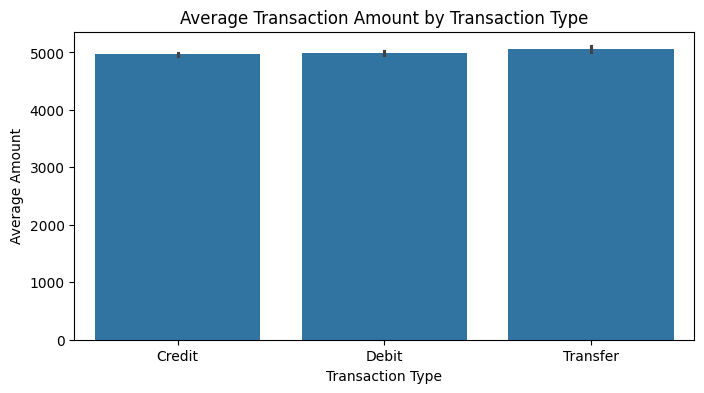

In [ ]:
#Average Transaction Amount by Transaction Type
plt.figure(figsize=(8,4))
sns.barplot(x='transaction_type', y='amount', data=df, estimator=np.mean)
plt.title('Average Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.show()

Certain transaction types involve higher average amounts, indicating differences in financial behavior across transaction categories.

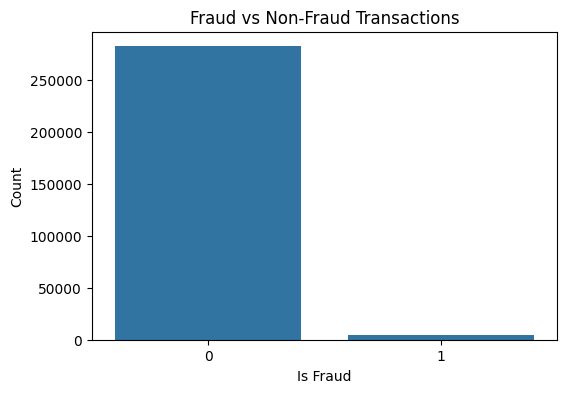

In [ ]:
#Fraud vs Non-Fraud Transaction Count
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

Fraudulent transactions form a very small portion of the dataset, highlighting a strong class imbalance.

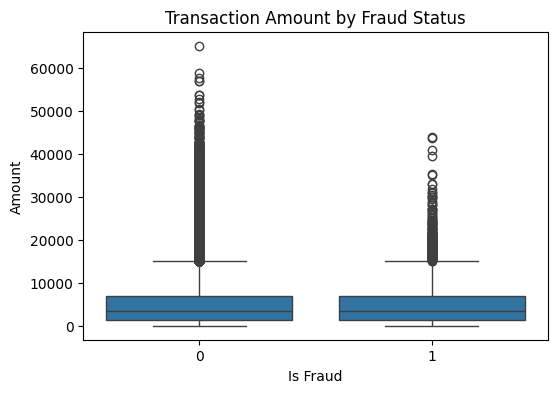

In [ ]:
#Amount Distribution by Fraud Status
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

Fraudulent transactions tend to involve higher transaction amounts compared to normal transactions.

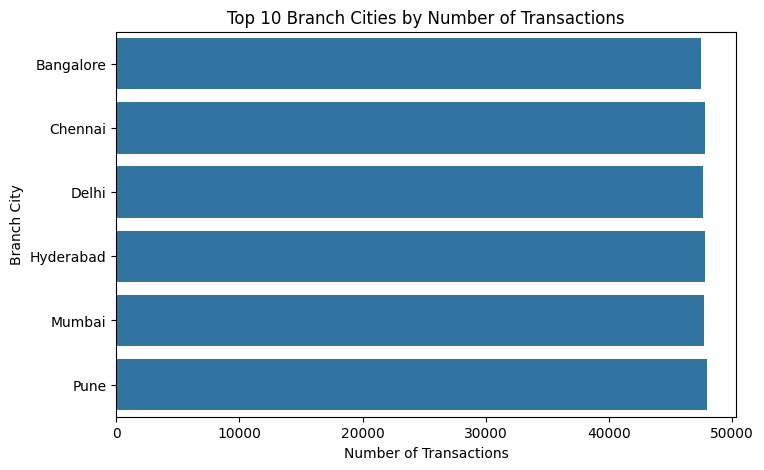

In [ ]:
#Transactions by Branch City (Top 10)
top_cities = df['branch_city'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Branch Cities by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Branch City')
plt.show()

A small number of cities contribute to a large portion of transaction volume, indicating concentrated banking activity.

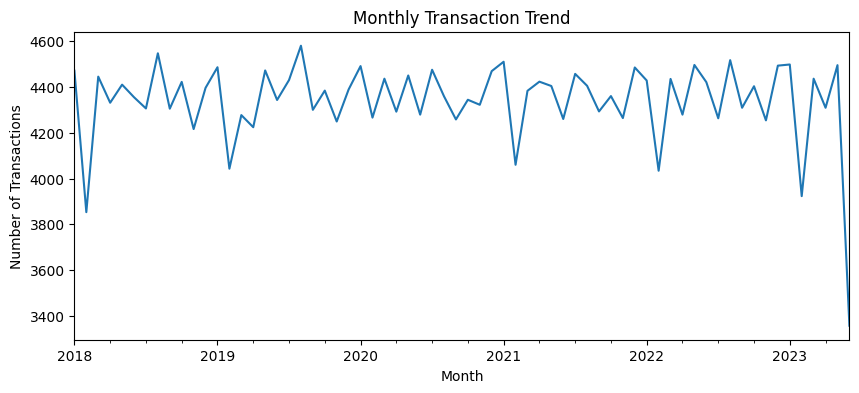

In [ ]:
#Transaction Trend Over Time (Monthly)
df['month'] = df['transaction_date'].dt.to_period('M')

monthly_txn = df.groupby('month').size()

plt.figure(figsize=(10,4))
monthly_txn.plot()
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

The time-series plot reveals trends and seasonality in transaction activity over time.

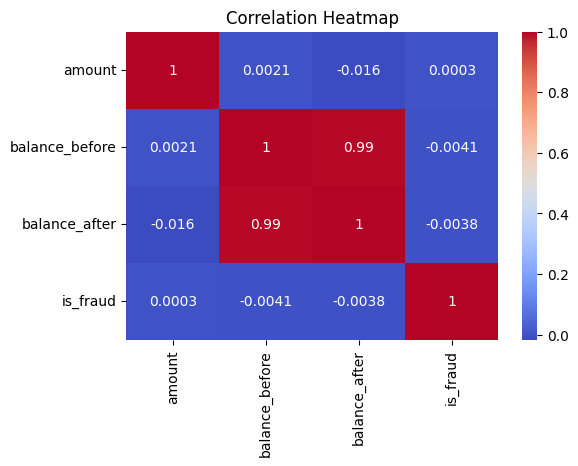

In [ ]:
#Heatmap: Correlation Between Numerical Features
plt.figure(figsize=(6,4))
corr = df[['amount', 'balance_before', 'balance_after', 'is_fraud']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The heatmap visualizes the correlation between numerical features, helping identify relationships and dependencies.

#**Key Insights**


*   The dataset contains a large volume of banking transactions, highlighting diverse customer behavior and financial activity patterns.

*   Transaction amounts are right skewed, with most transactions occurring at lower values while a few high-value transactions create extreme outliers.

*   A strong correlation exists between balance before and balance after transactions, indicating consistent account balance behavior.
*   Fraudulent transactions represent a very small percentage of total transactions, showing a highly imbalanced fraud distribution.


*   High transaction amounts and abnormal balance changes contribute significantly to the presence of outliers in the dataset.


*   Digital payment modes dominate transaction volume, reflecting a growing preference for online banking channels



#**Conclusion**
This project performed an end-to-end exploratory data analysis on a synthetic banking transaction dataset to understand transaction behavior and financial patterns. The analysis involved data cleaning, datatype correction, handling missing values, and visual exploration using statistical summaries and a correlation heatmap. The findings reveal right-skewed monetary distributions, strong balance correlations, and a low occurrence of fraudulent transactions. Overall, the project demonstrates how effective exploratory data analysis can uncover meaningful insights and prepare financial data for further modeling or decision-making.